In [416]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,12)
import pandas as pd
import math
from statsmodels.tsa.seasonal import STL
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [417]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [418]:
np.random.seed(5)

In [433]:
DATASET = "papas_g1.csv"
CROP = "PAPA PERUANITA (INJERTO)"

In [435]:
data = pd.read_csv('../Data/'+DATASET, engine='python')
data = data[data.producto == CROP]["precio_mean"]
data

303    1.582903
304    1.550645
305    1.393333
306    1.463226
307    1.259000
         ...   
399    1.403226
400    1.527419
401    1.749630
402    1.471290
403    1.758333
Name: precio_mean, Length: 101, dtype: float64

In [436]:
dataset = data.values
dataset = dataset.astype('float32')
dataset

array([1.5829033 , 1.5506451 , 1.3933333 , 1.4632258 , 1.259     ,
       1.1109678 , 1.113     , 1.0532258 , 0.85290325, 0.7736667 ,
       0.92290324, 1.0796666 , 1.4893548 , 1.5445161 , 1.2928572 ,
       1.2670968 , 0.974     , 0.88096774, 0.831     , 0.91290325,
       1.0841936 , 1.877     , 2.6625807 , 2.495     , 2.1348388 ,
       1.7951612 , 1.6089286 , 1.4658065 , 1.2296667 , 1.1332258 ,
       1.3446667 , 1.806129  , 2.1306453 , 2.897     , 2.8925807 ,
       2.4466667 , 2.1461291 , 1.6829032 , 1.5878571 , 1.8506452 ,
       1.387     , 1.1735483 , 1.0773333 , 1.1467742 , 1.0309677 ,
       0.9816667 , 0.99451613, 1.013     , 1.1541935 , 1.571     ,
       1.39      , 1.1196774 , 0.98366666, 0.9132258 , 1.061     ,
       1.1493548 , 1.2654839 , 1.517     , 2.273871  , 2.0986667 ,
       2.701613  , 2.4190323 , 1.7310715 , 1.9445162 , 1.8306667 ,
       1.3967742 , 1.344     , 1.4741936 , 1.4109677 , 2.085     ,
       2.108387  , 2.4856668 , 2.3638709 , 1.6051613 , 1.03482

In [437]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.reshape(-1,1))
dataset

array([[0.38111612],
       [0.3659239 ],
       [0.2918367 ],
       [0.32475314],
       [0.22857139],
       [0.15885451],
       [0.15981165],
       [0.13166046],
       [0.03731707],
       [0.        ],
       [0.0702841 ],
       [0.14411297],
       [0.33705875],
       [0.36303738],
       [0.2445167 ],
       [0.23238465],
       [0.09434849],
       [0.05053425],
       [0.02700156],
       [0.06557453],
       [0.14624503],
       [0.51962316],
       [0.88959837],
       [0.8106749 ],
       [0.6410544 ],
       [0.48108062],
       [0.39337292],
       [0.32596847],
       [0.2147567 ],
       [0.16933712],
       [0.26891682],
       [0.48624596],
       [0.63907933],
       [1.        ],
       [0.9979187 ],
       [0.78791213],
       [0.6463716 ],
       [0.42821184],
       [0.38344917],
       [0.5072112 ],
       [0.28885397],
       [0.18832728],
       [0.1430141 ],
       [0.1757178 ],
       [0.12117788],
       [0.09795919],
       [0.10401073],
       [0.112

In [438]:
train = dataset[0:int(dataset.shape[0]*0.8),:]
test = dataset[int(dataset.shape[0]*0.8):len(dataset),:]

In [439]:
time_steps = 3
n_features = 1
n_epochs = 100

In [440]:
trainX, trainY = create_dataset(train, time_steps)
testX, testY = create_dataset(test, time_steps)

In [441]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [442]:
model = Sequential()
model.add(LSTM(4, input_shape=(time_steps, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
76/76 - 3s - loss: 0.0754 - 3s/epoch - 40ms/step
Epoch 2/100
76/76 - 0s - loss: 0.0499 - 145ms/epoch - 2ms/step
Epoch 3/100
76/76 - 0s - loss: 0.0457 - 131ms/epoch - 2ms/step
Epoch 4/100
76/76 - 0s - loss: 0.0447 - 114ms/epoch - 1ms/step
Epoch 5/100
76/76 - 0s - loss: 0.0442 - 119ms/epoch - 2ms/step
Epoch 6/100
76/76 - 0s - loss: 0.0427 - 112ms/epoch - 1ms/step
Epoch 7/100
76/76 - 0s - loss: 0.0426 - 91ms/epoch - 1ms/step
Epoch 8/100
76/76 - 0s - loss: 0.0419 - 90ms/epoch - 1ms/step
Epoch 9/100
76/76 - 0s - loss: 0.0410 - 90ms/epoch - 1ms/step
Epoch 10/100
76/76 - 0s - loss: 0.0400 - 107ms/epoch - 1ms/step
Epoch 11/100
76/76 - 0s - loss: 0.0396 - 140ms/epoch - 2ms/step
Epoch 12/100
76/76 - 0s - loss: 0.0391 - 167ms/epoch - 2ms/step
Epoch 13/100
76/76 - 0s - loss: 0.0389 - 172ms/epoch - 2ms/step
Epoch 14/100
76/76 - 0s - loss: 0.0386 - 129ms/epoch - 2ms/step
Epoch 15/100
76/76 - 0s - loss: 0.0378 - 144ms/epoch - 2ms/step
Epoch 16/100
76/76 - 0s - loss: 0.0376 - 100ms/epoch -

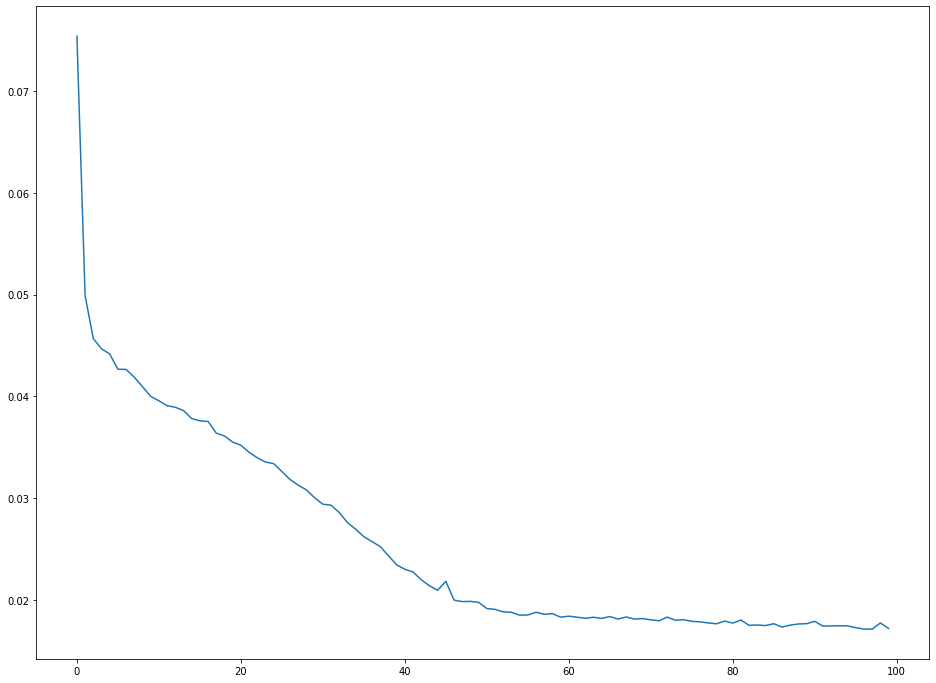

In [443]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [444]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

1/1 [==============================] - 0s 17ms/step


In [445]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


In [446]:
# calculate root mean squared error
trainScore = mean_absolute_percentage_error(trainY[0], trainPredict[:,0])
print('Train Score: %.2f MAPE' % (trainScore))
testScore = mean_absolute_percentage_error(testY[0], testPredict[:,0])
print('Test Score: %.2f MAPE' % (testScore))

Train Score: 0.14 MAPE
Test Score: 0.09 MAPE


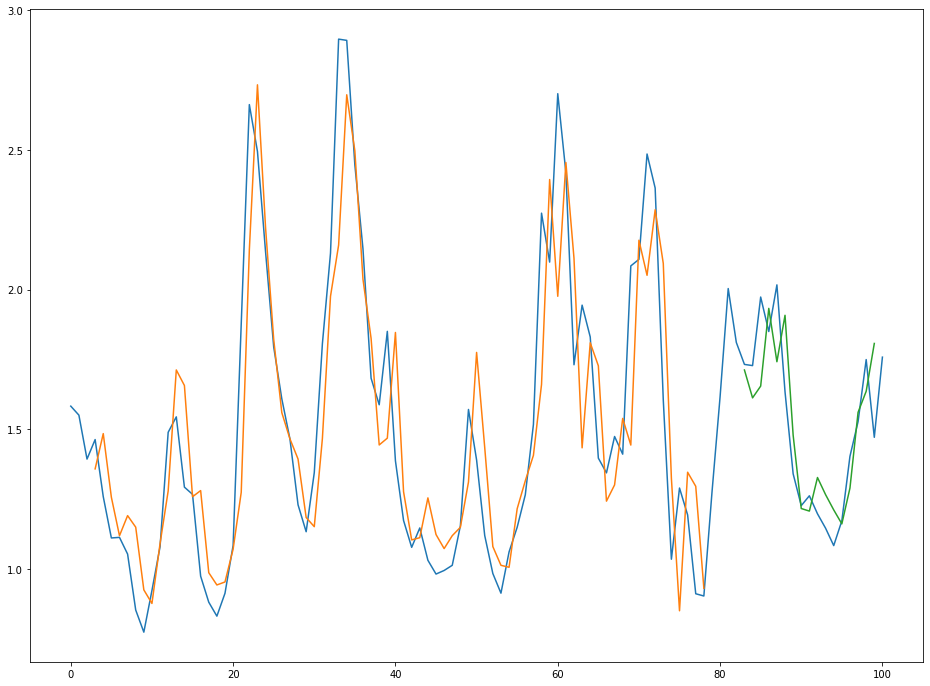

In [447]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_steps:len(trainPredict)+time_steps, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(time_steps*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()